## Prediction of H1N1 and Seasonal Flu Vaccination Uptake Using Machine Learning.

### Introduction
Influenza (flu) is a contagious respiratory illness that can cause serious complications, sometimes leading to hospitalization or even death. Remember the Spanish Flu that spread across the world courtesy of returning soldiers after World War 1? That was influenza. Those most at risk include older adults (65+ years), young children, and individuals with underlying health conditions (WHO, 2024).

The best way to protect yourself is through an annual flu vaccine, which reduces the severity of illness and related complications. The vaccine works by stimulating your immune system to produce protective antibodies within about two weeks (CDC, 2024). Health authorities recommend that everyone aged 6 months and older get vaccinated every year.

The **H1N1 pandemic** began in 2009 when a new influenza A virus strain emerged in the United States. It caused widespread illness and an estimated 151,700–575,400 deaths globally. Unlike typical seasonal flu, this outbreak mainly affected children and younger adults, while older adults were less impacted—likely because they had pre-existing immunity from exposure to a similar virus decades earlier. A targeted vaccine was rolled out in October 2009, and by August 2010, the World Health Organization declared the pandemic over. However, H1N1 did not disappear; it continues to circulate as part of the seasonal flu viruses we see today (CDC, 2024).

**Coronavirus Disease 2019 (COVID‑19)** was first identified in late 2019 in Wuhan, China, after clusters of patients presented with a severe respiratory illness resembling viral pneumonia. Rapid global spread, high hospitalization burdens in some settings, and early mortality uncertainty drove an urgent push to develop vaccines at unprecedented speed. That speed—along with changing public guidance, misinformation, and broader social distrust—contributed to widespread worry and reluctance around COVID‑19 vaccination in many communities (WHO; CDC; global public health reports).

This hesitation was not new. During the 2009 pandemic, public health officials reported similar concerns about a “fast‑tracked” vaccine, and uptake varied widely across populations. Studies from that period showed that risk perception, trust in authorities, and beliefs about vaccine safety strongly influenced whether people agreed to be immunized (global influenza behavior studies; pandemic preparedness literature).

**Vaccine hesitancy** refers to delay in acceptance or refusal of vaccines despite availability of vaccination services. It is shaped by factors such as confidence (trust in the vaccine and the system that delivers it), complacency (perceived need for the vaccine), and convenience (access). Hesitancy can shift over time and across social or cultural settings and has been identified by global health agencies as a significant threat to disease control efforts (WHO Strategic Advisory Group of Experts on Immunization; global vaccine confidence monitoring initiatives).

Pandemics amplify the stakes. When large numbers postpone or refuse vaccination during a fast‑moving outbreak, the result can be preventable illness, strain on health systems, and sustained community transmission. Evidence from recent survey research suggests that **past vaccine behavior may predict future decisions**: people who declined a prior influenza (including H1N1) vaccine have often reported lower willingness to accept newer vaccines such as those for COVID‑19 (comparative vaccine acceptance studies; vaccine confidence surveys).

#### What should public health teams do?
A practical first step is to use available data—socioeconomic and demographic indicators, healthcare access, prior vaccination history, perceived risk, and beliefs about vaccine effectiveness and safety—to identify groups at higher risk for hesitancy. From there, programs can:

* Tailor messages to local concerns (safety, side effects, speed of development).
* Engage trusted messengers: frontline clinicians, community leaders, faith groups.
* Improve convenience: mobile clinics, community vaccination days, combined care visits.
* Share transparent data on safety monitoring and real‑world effectiveness.
* Track sentiment over time and adjust outreach before the next surge or pandemic.

By combining behavioral insight with targeted communication and easier access, public health practitioners can reduce vaccine gaps—and be better prepared when the next emerging infection appears.

### Objective
The goal of this project is to create a model that can predict seasonal flu vaccine uptake based on a person's background and behavioral patterns. The project will be deemed a success when a model with the highest accuracy is developed.

### Project Pipeline
This outlines the processes to be undertaken in this project. They are:
1. Loading the data
2. Exploratory data analysis
3. Data processing
4. Modelling
5. Evaluation
6. Conclusion
7. Recommendations

### 1. Loading the Data
#### Importing relevant Libraries and loading Datasets

In [2]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,ConfusionMatrixDisplay,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFECV
from sklearn.ensemble import GradientBoostingClassifier
import joblib

In [3]:
# loading the dataset
test = pd.read_csv('test_set_features.csv')
features = pd.read_csv('training_set_features.csv')
labels = pd.read_csv('training_set_labels.csv')


### 1. Exploratory Data Analysis (EDA)

In [4]:
# viewing the first five rows of the datasets
test.head()
features.head()
labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


It is clear that all files share a similar "respondent_id" column. I will therefore merge the two training dataframes.

In [5]:
# joining the two dataframes
data = pd.merge(features, labels, on='respondent_id')
data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [6]:
# viewing number of rows and columns
data.shape

(26707, 38)

In [7]:
# viewing the datatypes
data.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [8]:
# viewing column statistics
data.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [9]:
# checking for missing values
missing = data.isna().sum().to_frame().sort_values(0,ascending = False)
missing

,0
employment_occupation,13470
employment_industry,13330
health_insurance,12274
income_poverty,4423
doctor_recc_seasonal,2160
doctor_recc_h1n1,2160
rent_or_own,2042
employment_status,1463
marital_status,1408
education,1407


#### Findings
* Most columns with float datatype are categorical in nature with values ranging from 0-5.
* Most columns have missing values
* There are no duplicate rows

#### Relationship between knowledge about H1N1 and vaccine utilisation.

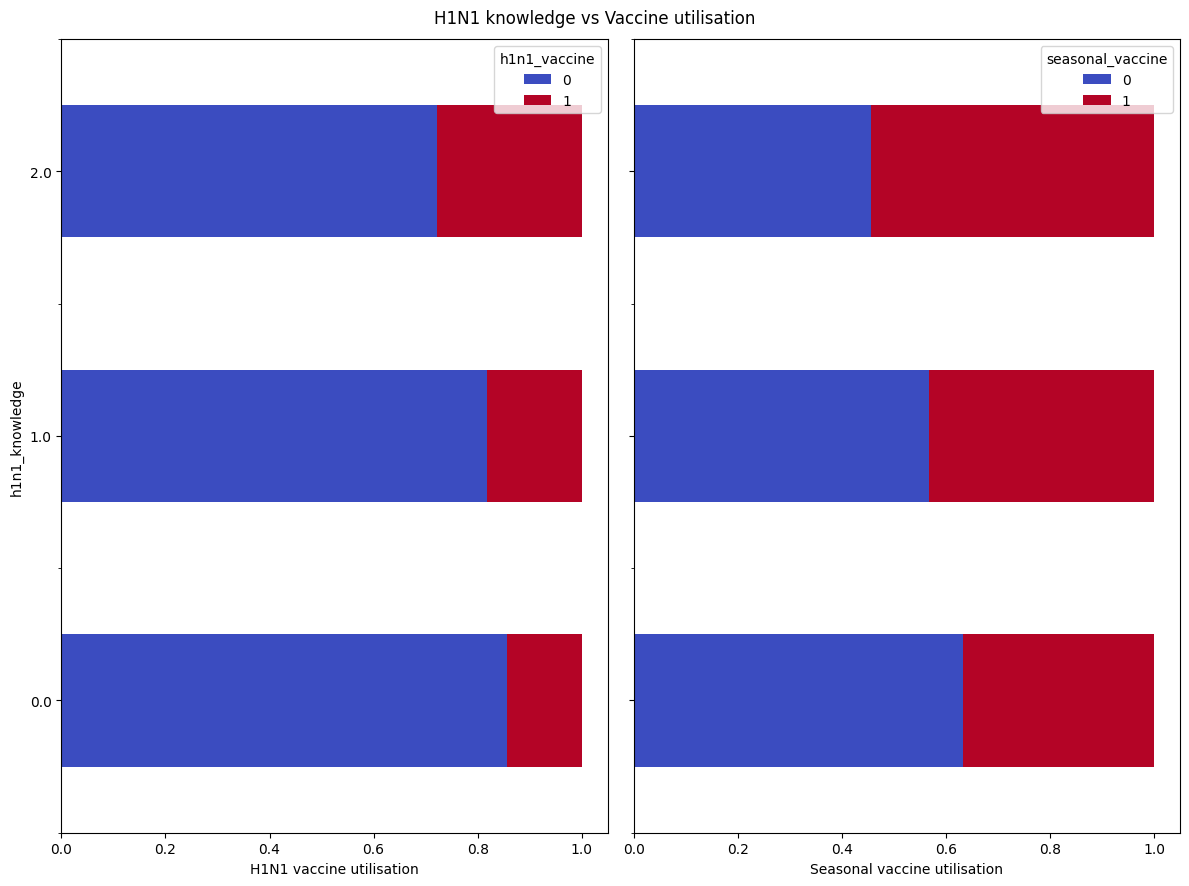

In [10]:
fig,(ax_1,ax_2) = plt.subplots(figsize = (12,9),ncols = 2,sharey = True)

my_cmap = plt.cm.coolwarm
crosstab_know1 = pd.crosstab(data["h1n1_knowledge"],data['h1n1_vaccine'],normalize="index")
crosstab_know1.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = ax_1)
crosstab_know2 = pd.crosstab(data["h1n1_knowledge"],data['seasonal_vaccine'],normalize="index")
crosstab_know2.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = ax_2)
ax_1.set_xlabel("H1N1 vaccine utilisation")
ax_2.set_xlabel("Seasonal vaccine utilisation")

fig.suptitle("H1N1 knowledge vs Vaccine utilisation")
fig.tight_layout()

There is a noticeable increase in vaccine utilisation with increase in H1N1 knowledge. People are once again more likely to take seasonal flu vaccinations.

#### Relationship between concern about H1N1 and vaccine utilisation

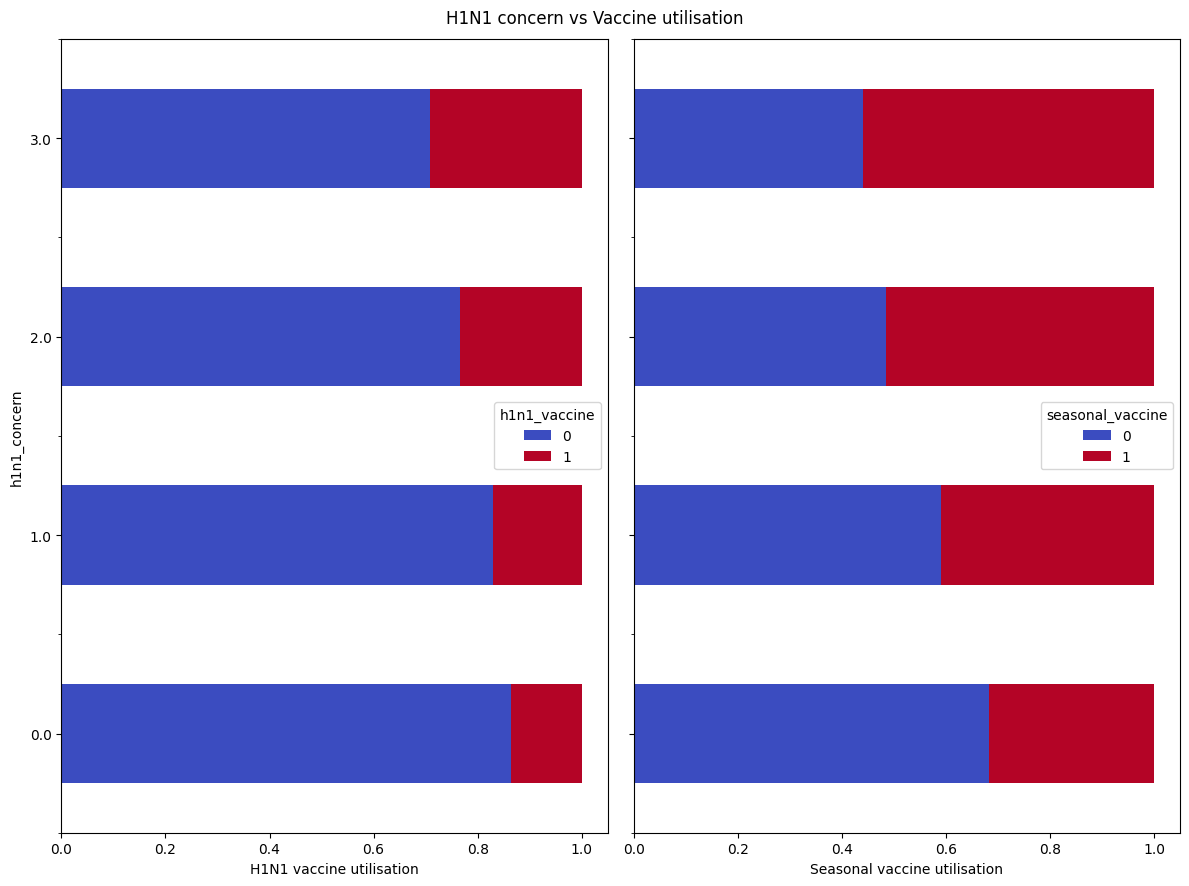

In [11]:
my_cmap = plt.cm.coolwarm
fig,(ax_1,ax_2) = plt.subplots(figsize = (12,9),ncols = 2,sharey = True)

crosstab_concern1 = pd.crosstab(data["h1n1_concern"],data['h1n1_vaccine'],normalize="index")
crosstab_concern1.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = ax_1)
crosstab_concern2 = pd.crosstab(data["h1n1_concern"],data['seasonal_vaccine'],normalize="index")
crosstab_concern2.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = ax_2)
ax_1.set_xlabel("H1N1 vaccine utilisation")
ax_2.set_xlabel("Seasonal vaccine utilisation")

fig.suptitle("H1N1 concern vs Vaccine utilisation")
fig.tight_layout()

From this graph, the higher the concern about being infected with H1N1, the higher the likelihood of utilising the vaccine. Utilisation of seasonal flu vaccine is noticeably higher in all categories.

#### Relationship between gender, race, age group and vaccine uptake.

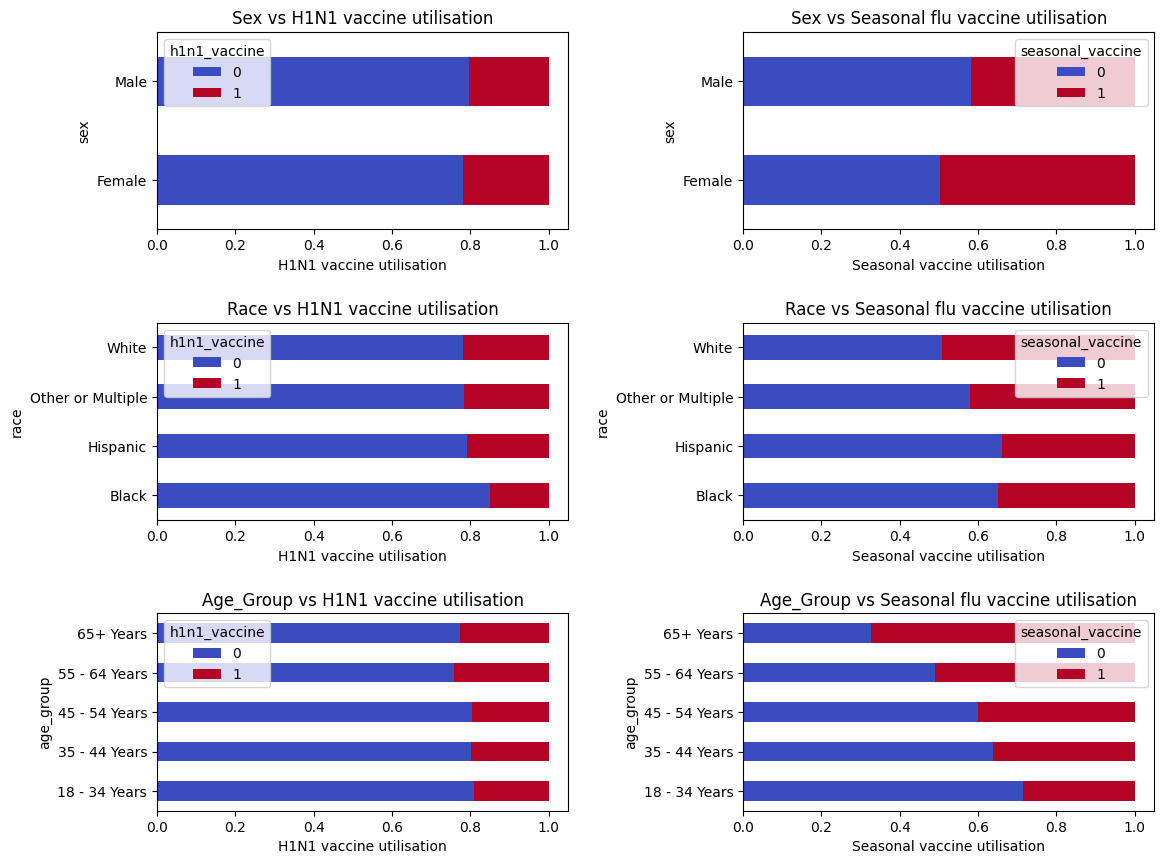

In [12]:
fig,axes = plt.subplots(figsize = (12,9),ncols = 2,nrows = 3)
to_plot = ["sex","race","age_group"]

for idx,col in enumerate(to_plot):
    left_ax = axes[idx,0]
    right_ax = axes[idx,1]

    crosstab1 = pd.crosstab(data[col],data['h1n1_vaccine'],normalize="index")
    crosstab1.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = left_ax)
    crosstab2 = pd.crosstab(data[col],data['seasonal_vaccine'],normalize="index")
    crosstab2.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = right_ax)
    left_ax.set_xlabel("H1N1 vaccine utilisation")
    right_ax.set_xlabel("Seasonal vaccine utilisation")
    left_ax.set_title(f"{col.title()} vs H1N1 vaccine utilisation")
    right_ax.set_title(f"{col.title()} vs Seasonal flu vaccine utilisation")

fig.tight_layout(pad=2);

From the graphs produced, the following observations are noted:
* There are more women taking the seasonal flu vaccine. Vaccine utilisation between the genders is almost equal, however.
* H1N1 vaccine utilisation is also almost equal among all races except for the black race. Seasonal flu vaccine utilisation is much higher across the board.
* In the various age groups, H1N1 vaccine utilisation is almost similar across age groups. Younger respondents are less likely to take the seasonal flu vaccine however. 


#### Influence of opinions on seasonal flu vaccine uptake?

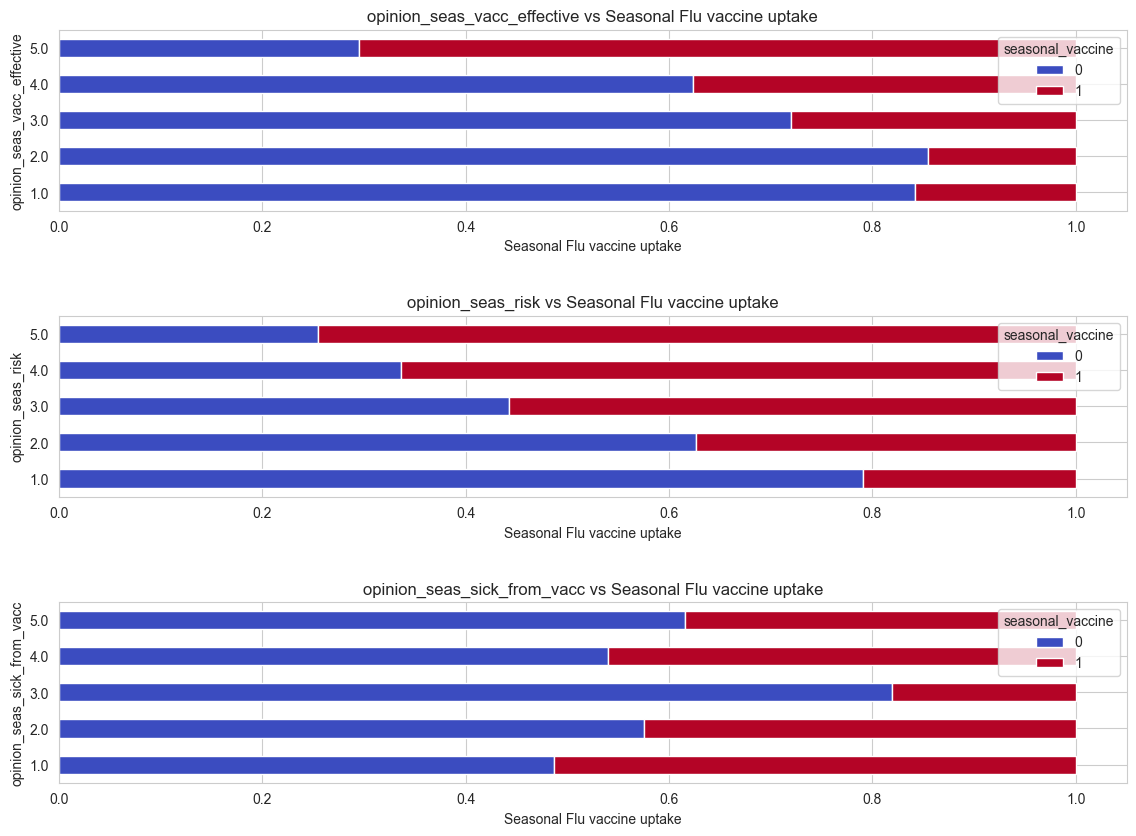

In [21]:
fig,axes = plt.subplots(figsize = (12,9),nrows = 3)
features_to_plot = ['opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc',]

for idx,col in enumerate(features_to_plot):
    ax = axes[idx]
    crosstab1 = pd.crosstab(data[col],data['seasonal_vaccine'],normalize="index")
    crosstab1.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = ax)
    ax.set_xlabel("Seasonal Flu vaccine uptake")
    ax.set_title(f"{col} vs Seasonal Flu vaccine uptake")

fig.tight_layout(pad=3);

Individuals that believe in the effectiveness of the seasonal flu vaccine are more likely to utilise it. People that are also more cautious about the risk of catching the flu without the vaccine are also more likely to utilise it.

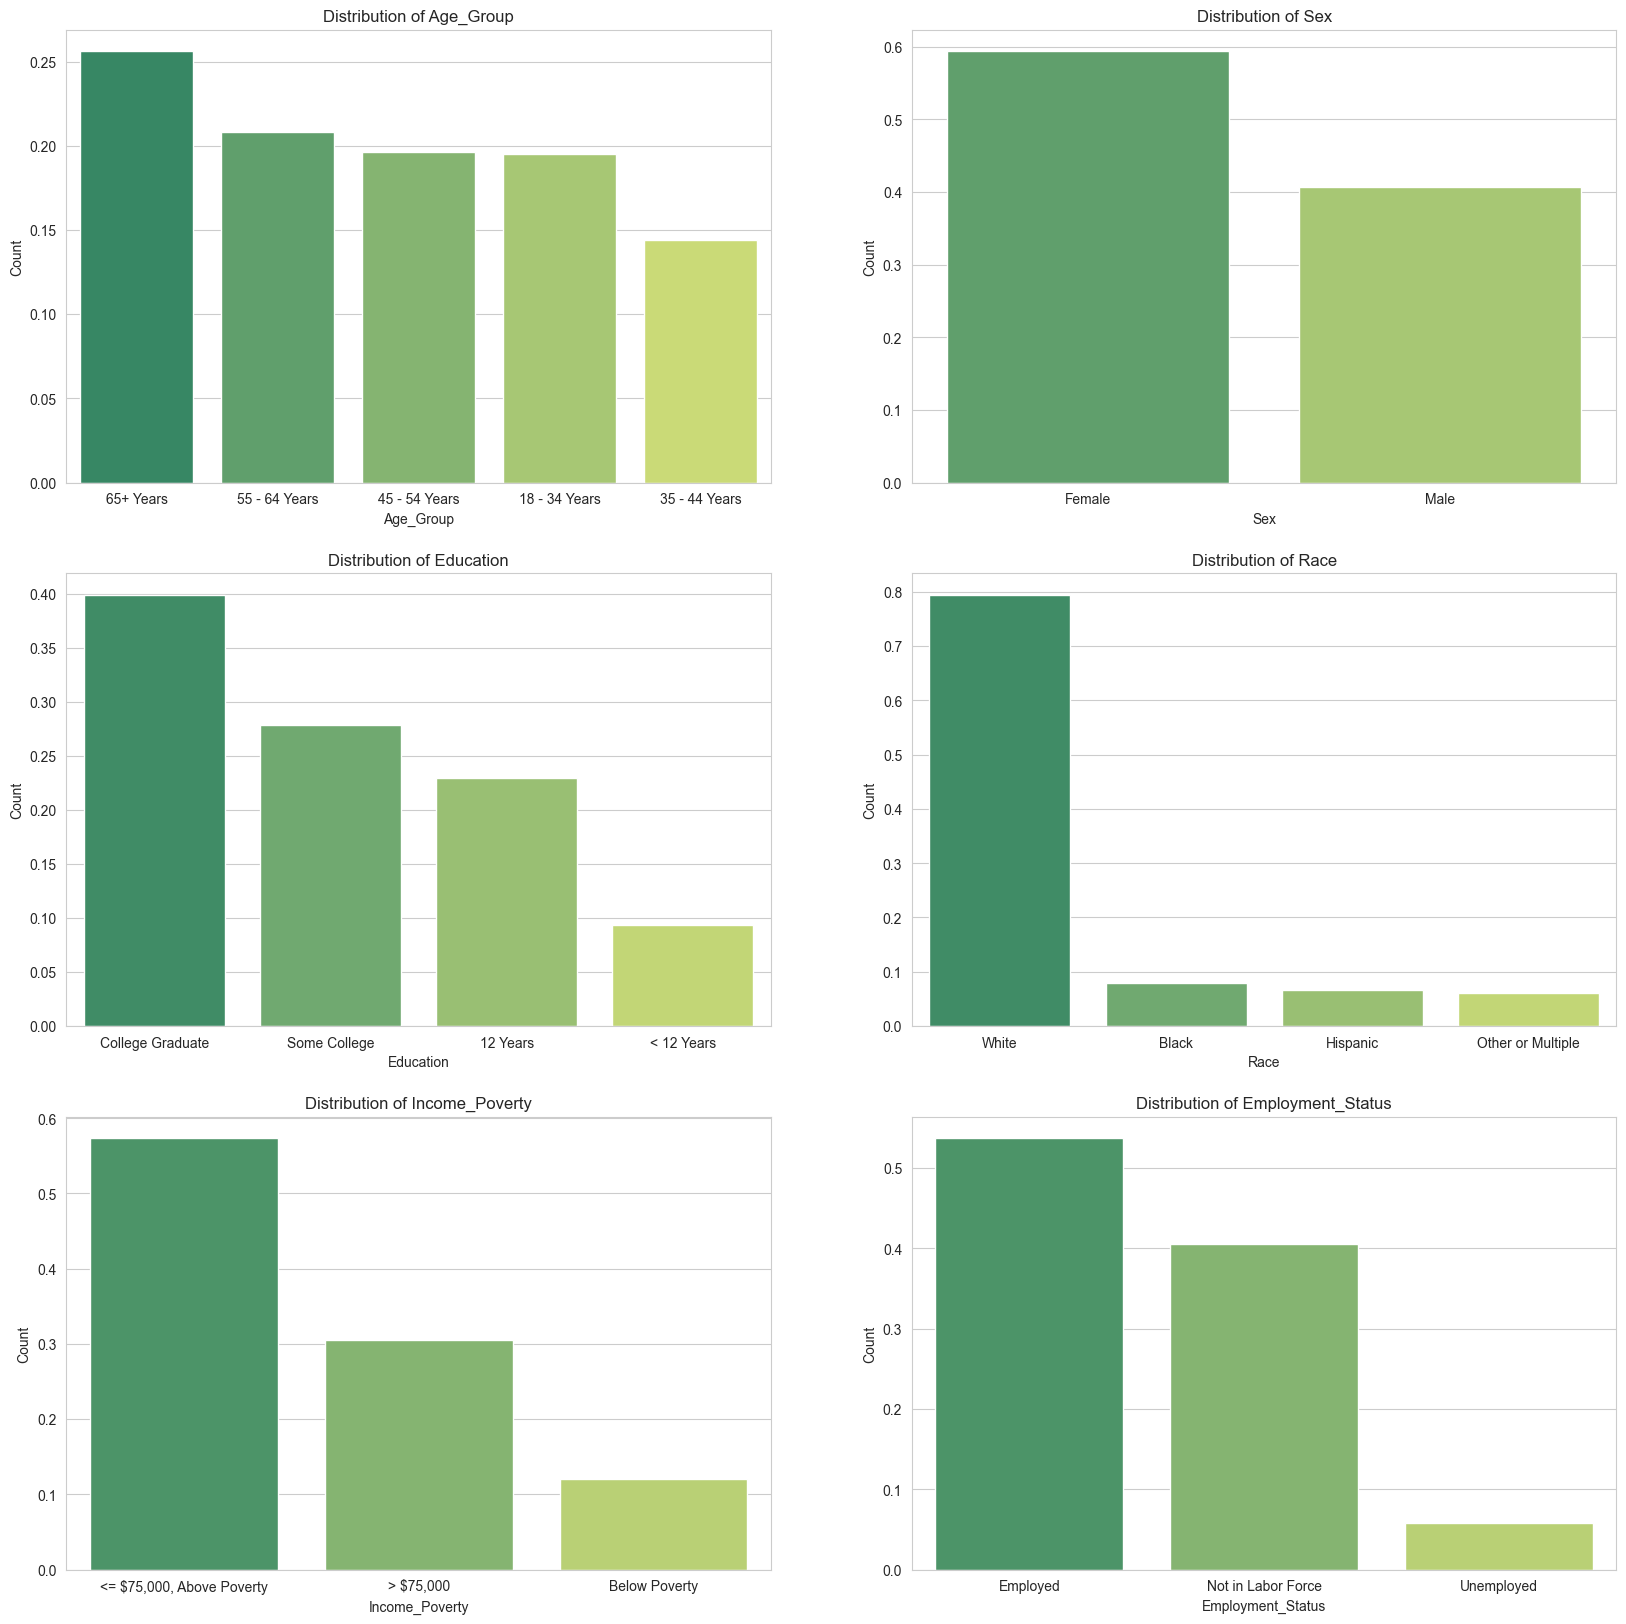

In [23]:
# adding columns to plot to a list
columns = ["age_group","sex","education","race","income_poverty","employment_status"]

# setting style,axes and figsize
fig,axes = plt.subplots(figsize = (20,20),nrows = 3,ncols = 2)
sns.set_style("whitegrid")

for i,col in enumerate(columns):
    # defining the axis for plotting
    row = i//2
    column = i%2
    ax = axes[row][column]
    # defining x and y for the barchart
    x = data[col].value_counts(normalize=True).index
    y = data[col].value_counts(normalize=True)
    sns.barplot(x=x, y=y, hue=x, palette="summer", ax=ax, legend=False)
    ax.set_xlabel(f"{col.title()}")
    ax.set_ylabel("Count")
    ax.set_title(f"Distribution of {col.title()}");

#### Observations
* Majority of the respondents are above 65 years of age.
* About 60% of the respondents are female.
* Most of the respondents are college graduates.
* 80% are white.
* About 60% earn between the poverty line and around $75,000 annually.
* Most of the respondents are employed.